# Analisis Base de datos

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

## Limpiar BD

In [2]:
users = pd.read_csv('./../00 Insumos/04 Wekun/users_16-09-2019.csv')
answers = pd.read_csv('./../00 Insumos/04 Wekun/answers_16-09-2019.csv')

In [3]:
answers.head()

,id,user_id,img_1,img_2,question,choice,create_at
0,0,6211ef85-5708-11e9-b416-005056b5408a,513da00ffdc9f035870088ac,5140d7c5fdc9f0492600389c,3,X,2019-04-04 18:35:16.274433
1,1,6211ef85-5708-11e9-b416-005056b5408a,50f5eb69fdc9f065f00082ba,50f5ed99fdc9f065f0008e24,3,image_1,2019-04-09 17:01:19.859871
2,2,5977a108-cb60-11e9-ab8a-26bced1dfc9f,50f5ee93fdc9f065f0008e9b,51414c84fdc9f0492600735a,4,image_2,2019-08-30 19:57:12.630880
3,3,6211ef85-5708-11e9-b416-005056b5408a,51413469fdc9f0492600464d,513da0effdc9f03587008a5d,3,image_1,2019-04-04 18:35:42.310486
4,4,5977a108-cb60-11e9-ab8a-26bced1dfc9f,513d78fefdc9f0358700635d,513e5d81fdc9f0358700adf9,4,image_1,2019-08-30 19:57:16.565865


In [4]:
answers['choice'] = answers['choice'].replace({'image_1':1,
                                   'image_2':2,
                                   '=':3,
                                   '= ':3,
                                   'X':99})
answers['choice'] = answers['choice'].astype(int)

In [5]:
answers.shape

(27311, 7)

In [6]:
answers.dtypes

id            int64
user_id      object
img_1        object
img_2        object
question      int64
choice        int32
create_at    object
dtype: object

In [7]:
users.head()

,id,user_id,device_id,create_at,age,gender,education,transport,nationality,ip_address,...,psico2,psico3,psico4,psico5,psico6,psico7,psico8,psico9,psico10,income
0,0,6211ef84-5708-11e9-b416-005056b5408a,0ed3319d-5231-11e9-b416-005056b5408a,2019-04-04 18:35:12.827850,24,M,es6i,3,Chile,10.200.63.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6211ef85-5708-11e9-b416-005056b5408a,0ed3319d-5231-11e9-b416-005056b5408a,2019-04-04 18:35:12.852640,24,M,es6i,3,Chile,10.200.63.143,...,++,0,++,--,+,++,++,-,0,0
2,2,635095e2-570a-11e9-b416-005056b5408a,635095e3-570a-11e9-b416-005056b5408a,2019-04-04 18:49:33.908703,29,M,es6,3,Colombia,10.200.61.37,...,+,++,++,--,++,++,++,+,++,1200000
3,3,cabb1b9e-570a-11e9-b416-005056b5408a,cabb1b9f-570a-11e9-b416-005056b5408a,2019-04-04 18:52:27.409701,24,F,es6i,3,Chile,146.155.17.156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0533a2ea-570c-11e9-b416-005056b5408a,0533a2eb-570c-11e9-b416-005056b5408a,2019-04-04 19:01:15.005813,23,F,es5i,3,Chile,10.200.53.197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
users.dtypes

id              int64
user_id        object
device_id      object
create_at      object
age            object
gender         object
education      object
transport       int64
nationality    object
ip_address     object
comuna         object
region         object
country        object
browser        object
platform       object
psico1         object
psico2         object
psico3         object
psico4         object
psico5         object
psico6         object
psico7         object
psico8         object
psico9         object
psico10        object
income         object
dtype: object

In [9]:
users.rename(columns={'id':'user'}, inplace=True)

       
users['gender'] = users['gender'].replace({'M':0,
                                   'F':1,
                                  'O':99})
users['education'] =  users['education'].replace({'es1':1,'en1':1,
                                          'es2i':1,'en2i':1,
                                          'es3i':2,'en3i':2,
                                          'es4i':3,'en4i':3,
                                          'es5i':3,'en5i':3,
                                          'es6i':5,'en6i':5,
                                          'es2':2,'en2':2,
                                          'es3':3,'en3':3,
                                          'es4':4,'en4':4,
                                          'es5':5,'en5':5,
                                          'es6':6,'en6':6})
users = users.astype({'user_id':str,
              'user':int,
              'age':float,
              'gender':int,
              'education':int,
              'transport':int})
age_outlayers = users[(users["age"]>= 100) | \
                     (users["age"]< 0)]

users = users[(users["age"]< 100) & \
         (users["age"]>= 0)]

users = users.astype({'age':int})

In [10]:
users.columns

Index(['user', 'user_id', 'device_id', 'create_at', 'age', 'gender',
       'education', 'transport', 'nationality', 'ip_address', 'comuna',
       'region', 'country', 'browser', 'platform', 'psico1', 'psico2',
       'psico3', 'psico4', 'psico5', 'psico6', 'psico7', 'psico8', 'psico9',
       'psico10', 'income'],
      dtype='object')

In [11]:
users.shape

(1530, 26)

In [12]:
df = pd.merge(answers,users, how='inner', on='user_id', sort=False, indicator=False,suffixes=('_ans', '_usr'))

In [13]:
df.columns

Index(['id', 'user_id', 'img_1', 'img_2', 'question', 'choice',
       'create_at_ans', 'user', 'device_id', 'create_at_usr', 'age', 'gender',
       'education', 'transport', 'nationality', 'ip_address', 'comuna',
       'region', 'country', 'browser', 'platform', 'psico1', 'psico2',
       'psico3', 'psico4', 'psico5', 'psico6', 'psico7', 'psico8', 'psico9',
       'psico10', 'income'],
      dtype='object')

In [14]:
features = pd.read_csv('./../00 Insumos/01 PP/all_features_imagenes.csv')
models_db = df

In [15]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,111299.0,55649.000000,32129.398143,0.000000,27824.500000,55649.000000,83473.500000,111298.000000
NA,111299.0,0.008356,0.091028,0.000000,0.000000,0.000000,0.000000,1.000000
blobs,111299.0,6.705379,5.593245,0.000000,3.000000,6.000000,9.000000,228.000000
edges,111299.0,0.047655,0.025642,0.001892,0.029048,0.041626,0.060981,0.191238
mean_bn,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_bs,111299.0,120.844008,18.807386,6.798443,110.955231,123.051493,132.580310,225.421562
mean_h,111299.0,60.195388,11.406337,1.447668,53.011068,59.101076,66.687969,131.885064
mean_l,111299.0,119.096128,19.026994,6.764549,108.970807,121.223148,130.992674,224.429988
mean_s,111299.0,37.371330,13.979141,1.500185,26.914847,36.207778,46.279873,226.130839
stdev_bn,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
models_db = models_db.merge(features, how='inner', left_on='img_1', right_on='ID', sort=False, suffixes=('', '_izq'))
models_db = models_db.merge(features, how='inner', left_on='img_2', right_on='ID', sort=False, suffixes=('_izq', '_der'))
# models_db = models_db.drop(columns=['img_1','img_2','ID_izq','ID_der'])

In [17]:
df = pd.read_csv('./../04 Modelos/log_data-sin_filtrar.dat',sep='\t')
df['id'] =1

In [18]:
# outliers = models_db[(models_db['NA_izq'] != 0) | (models_db['NA_der'] != 0) | \
#              (models_db['outlier_bn_izq'] != 0) | (models_db['outlier_bn_der'] != 0) | \
#              (models_db['outlier_hs_izq'] != 0) | (models_db['outlier_hs_der'] != 0) | \
#              (models_db['outlier_hlf_izq'] > 1) | (models_db['outlier_hlf_der'] > 1)]

models_db = models_db[(models_db['NA_izq'] == 0) & (models_db['NA_der'] == 0)] 
# & \
#              (models_db['outlier_bn_izq'] == 0) & (models_db['outlier_bn_der'] == 0) & \
#              (models_db['outlier_hs_izq'] == 0) & (models_db['outlier_hs_der'] == 0) & \
#              (models_db['outlier_hlf_izq'] <= 1) & (models_db['outlier_hlf_der'] <= 1)]

In [19]:
df = models_db

## Respuestas total por modelo

In [20]:
users = df.groupby(['user_id']).first()
users.groupby(['gender']).count()['id']

gender
0     825
1     505
99     12
Name: id, dtype: int64

In [21]:
12/(825 + 505 + 12)

0.00894187779433681

In [22]:
users = df.groupby(['user_id']).first()
users.groupby(['country']).count().sort_values(['id'])['id']

country
El Salvador           1
Iceland               1
Norway                1
Panama                1
Cyprus                1
Costa Rica            1
China                 1
Portugal              1
Italy                 1
Benin                 1
Romainia              1
Bangladesh            1
Bahamas               1
Solomon Islands       1
Aruba                 1
Sweden                1
Anguilla              1
American Samoa        1
Belgium               1
Japan                 1
Peru                  2
Armenia               2
Ecuador               2
New Zealand           2
Uruguay               3
Germany               3
Canada                4
Argentina             4
Netherlands           5
Mexico                5
Afghanistan           5
France                7
Spain                 7
United Kingdom        9
Australia            10
Brazil               11
USA                  46
Chile              1195
Name: id, dtype: int64

In [23]:
11/(825 + 505 + 12)

0.00819672131147541

In [24]:
25369 - 25198

171

In [25]:
pd.pivot_table(df,values='id',index=['question'],columns=['choice'],aggfunc='count',margins=True)
# 1: img 1
# 2: img 2
# 3: equal
# 99: error

choice,1,2,3,99,All
question,,,,,
1,3176,3235,774,524,7709
2,2273,2373,552,370,5568
3,1658,1779,681,156,4274
4,2219,2285,608,245,5357
5,1633,1614,545,213,4005
All,10959,11286,3160,1508,26913


In [26]:
pd.pivot_table(df,values='id',index=['question'],columns=['choice'],aggfunc='count',margins=True)
# 1: img 1
# 2: img 2
# 3: equal
# 99: error

choice,1,2,3,99,All
question,,,,,
1,3176,3235,774,524,7709
2,2273,2373,552,370,5568
3,1658,1779,681,156,4274
4,2219,2285,608,245,5357
5,1633,1614,545,213,4005
All,10959,11286,3160,1508,26913


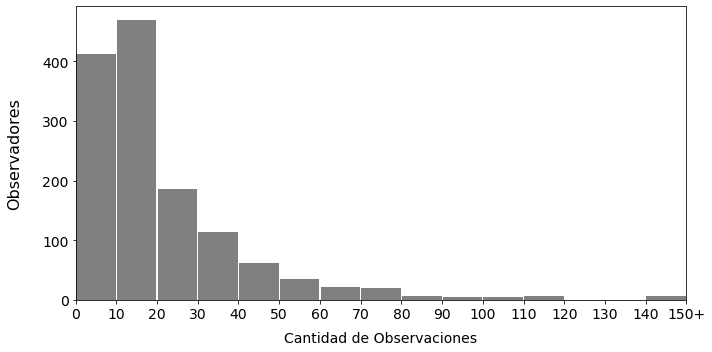

In [67]:
data = answers.groupby('user_id').count().loc[:,'id'].values
bins = np.arange(0,155,10)

fig, ax = plt.subplots(figsize=(10,5))
_, bins, patches = plt.hist([np.clip(data, bins[0], bins[-1])],
                            # normed=1,  # normed is deprecated; replace with density
#                             density=True,
                            bins=bins, color=['grey'], label=['A'],
                            rwidth = 0.97)

xlabels = bins[0:].astype(str)
xlabels[-1] += '+'

N_labels = len(xlabels)
plt.xlim([0, 150])
plt.xticks(10 * np.arange(N_labels))
ax.set_xticklabels(xlabels)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

# plt.yticks([])
plt.title('')
plt.setp(patches, linewidth=0)
# plt.legend(loc='upper left')
plt.ylabel("Observadores", fontsize=16, labelpad=20)
plt.xlabel("Cantidad de Observaciones", fontsize=14, labelpad=10)

fig.tight_layout()
# data

# A = answers.groupby('user_id').count().loc[:,'id'].hist(bins=150, figsize = (10,6), xlabelsize =12, ylabelsize =12)
# A.set_xlim(0,150)

In [76]:
data.shape
data.mean()
# data.std()

20.275426874536006

In [45]:
ans_per_question = answers.groupby(['user_id','question']).count().reset_index().loc[:,['user_id','question','id']]
ans_per_question = ans_per_question.merge(users.loc[:,['gender','transport']].reset_index(),on='user_id')
ans_per_question 

,user_id,question,id,gender,transport
0,0028e520-be87-11e9-b304-005056b5408a,3,8,1,3
1,00472d4e-5a2f-11e9-b416-005056b5408a,3,9,0,3
2,008864fa-be19-11e9-b304-005056b5408a,4,5,1,3
3,009ad910-5a36-11e9-b416-005056b5408a,1,34,0,3
4,009ad910-5a36-11e9-b416-005056b5408a,2,12,0,3
...,...,...,...,...,...
2707,ffcf76b8-d333-11e9-bb50-de0b855a7cc5,1,1,0,3
2708,ffcf76b8-d333-11e9-bb50-de0b855a7cc5,4,2,0,3
2709,ffcf76b8-d333-11e9-bb50-de0b855a7cc5,5,1,0,3
2710,ffe679aa-7e68-11e9-bbb0-005056b5408a,3,4,0,1


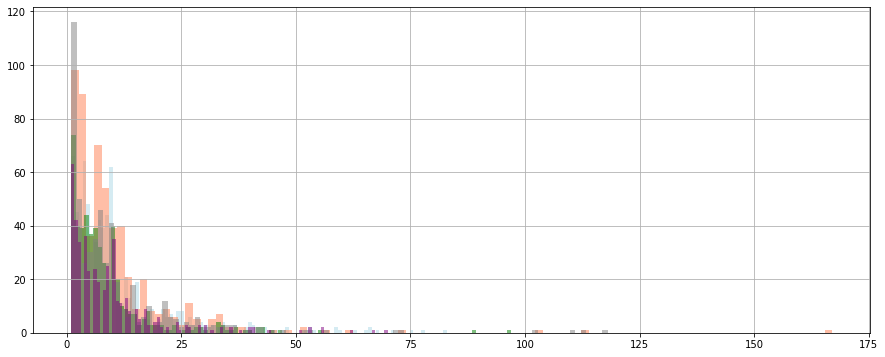

In [62]:
# ans_per_question.loc[(ans_per_question.question=1),:].id.hist(ax=ax,bins=100)

fig, ax = plt.subplots(1,1,figsize = (15,6))
ans_per_question.loc[(ans_per_question.question ==1),:].id.hist(ax=ax,bins=100,alpha=0.5,color='lightblue')
ans_per_question.loc[(ans_per_question.question ==2),:].id.hist(ax=ax,bins=100,alpha=0.5,color='coral')
ans_per_question.loc[(ans_per_question.question ==3),:].id.hist(ax=ax,bins=100,alpha=0.5,color='green')
ans_per_question.loc[(ans_per_question.question ==4),:].id.hist(ax=ax,bins=100,alpha=0.5,color='grey')
ans_per_question.loc[(ans_per_question.question ==5),:].id.hist(ax=ax,bins=100,alpha=0.5,color='purple')
# safety.Utilidad_male.hist(ax=ax,bins=120,alpha=0.5,color='lightblue', label='Male')
# safety.Utilidad_female.hist(ax=ax,bins=120,alpha=0.5,color='coral', label='Female')
# safety.Utilidad_OD.hist(ax=ax,bins=120,alpha=0.5,color='lightgrey', label='Modelo sin heterogeneidad')
# leg = ax.legend()

# plt.xlim(0,7)

# ax.legend(loc='upper left', fontsize=12)
# plt.ylabel("Frequency", fontsize=12, labelpad=20)
# plt.xlabel("Score", fontsize=12, labelpad=10)

In [81]:
ans_per_question.groupby('transport').mean().id

transport
1    11.291339
2    10.652500
3     9.701364
4     9.787832
5    14.916667
Name: id, dtype: float64

In [80]:
ans_per_question.groupby('transport').std().id

transport
1    16.016844
2    10.065288
3    11.375316
4    12.017640
5    21.526357
Name: id, dtype: float64

In [29]:
answers.groupby('user_id').count().loc[:,'id'].mode()

0    10
dtype: int64

In [30]:
answers.groupby('user_id').count().loc[:,'id'].sort_values()

user_id
6e4ac810-d1b6-11e9-b304-005056b5408a      1
f6151442-5a3a-11e9-b416-005056b5408a      1
18764fe4-894b-11e9-bbb0-005056b5408a      1
3d62fe42-5ba1-11e9-b416-005056b5408a      1
a52f215e-98d2-11e9-b304-005056b5408a      1
                                       ... 
c04c8524-98f7-11e9-b304-005056b5408a    158
16ee47da-5b2e-11e9-b416-005056b5408a    167
562c5d54-5a5e-11e9-b416-005056b5408a    178
90f3ce4e-d1bf-11e9-850d-c62f94edf013    193
7e5707ea-d379-11e9-bb50-de0b855a7cc5    379
Name: id, Length: 1347, dtype: int64

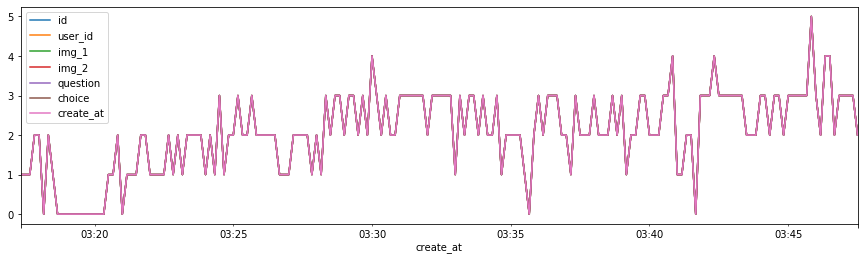

In [31]:
aux = answers.loc[(answers.user_id == '7e5707ea-d379-11e9-bb50-de0b855a7cc5')]
aux.set_index(pd.to_datetime(aux.create_at), inplace=True)
aux_day = aux.resample('10S').count()
aux_day.plot(figsize=(15, 4))

In [32]:
users.loc[(users.index == '7e5707ea-d379-11e9-bb50-de0b855a7cc5')].T

user_id,7e5707ea-d379-11e9-bb50-de0b855a7cc5
id,18291
img_1,5140b7b0fdc9f04926001a90
img_2,513e1f8bfdc9f03587009f64
question,3
choice,1
...,...
od_stop_sign_der,0
od_traffic_light_der,0
od_train_der,0
od_truck_der,0


### Respuestas con psicometricos

In [33]:
pd.pivot_table(df[(df['psico1'].notnull())],values='id',index=['question'],columns=['choice'],aggfunc='count',margins=True)
# 1: img 1
# 2: img 2
# 3: equal
# 99: error

choice,1,2,3,99,All
question,,,,,
1,1501,1526,348,190,3565
2,1089,1168,279,223,2759
3,856,905,360,93,2214
4,1226,1226,313,152,2917
5,787,787,248,133,1955
All,5459,5612,1548,791,13410


### Respuestas por sexo

In [34]:
sexo = pd.pivot_table(df,values='id',index=['question'],columns=['gender'],aggfunc='count',margins=True)
sexo['perc_male'] = round(sexo[0]/sexo['All']*100,1)
sexo['perc_female'] = round(sexo[1]/sexo['All']*100,1)
sexo['perc_other'] = round(sexo[99]/sexo['All']*100,1)
# 0: Male
# 1: Female
# 99: Other
sexo[['All','perc_male','perc_female','perc_other']]

gender,All,perc_male,perc_female,perc_other
question,,,,
1,7709,57.0,41.5,1.6
2,5568,60.1,39.6,0.4
3,4274,58.7,40.0,1.3
4,5357,51.6,47.2,1.2
5,4005,53.1,46.2,0.7
All,26913,56.2,42.7,1.1


In [35]:
round((sexo.iloc[:,[0,1,2]]),1) #/(sexo.iloc[:,3])).T*100,1)

gender,0,1,99
question,,,
1,4391,3196,122
2,3345,2203,20
3,2510,1708,56
4,2762,2531,64
5,2127,1850,28
All,15135,11488,290


### Respuestas por modo de Transporte

In [36]:
modo = pd.pivot_table(df,values='id',index=['question'],columns=['transport'],aggfunc='count',margins=True)

round((modo.iloc[:,[0,1,2,3,4]].T/modo.iloc[:,5]).T*100,1)
# .to_latex()

# modo.iloc[:,5]
# 1: Walk
# 2: Bike
# 3: PT
# 4: Car
# 5: Other

transport,1,2,3,4,5
question,,,,,
1,12.6,15.4,48.7,21.9,1.3
2,10.4,15.9,49.3,23.3,1.1
3,10.9,16.4,47.8,21.7,3.3
4,10.5,14.0,50.4,24.2,0.9
5,6.1,17.1,52.1,24.5,0.1
All,10.5,15.7,49.5,23.0,1.3


### Respuestas por nivel educacional

In [37]:
pd.pivot_table(df,values='id',index=['question'],columns=['education'],aggfunc='count',margins=True)
# 1: None
# 2: Elementary completed
# 3: Highschool completed
# 4: Techschool completed
# 5: University undergrad completed
# 6: MSc or PhD completed

education,1,2,3,4,5,6,All
question,,,,,,,
1,19,59,2204,108,3382,1937,7709
2,13,41,1375,316,2273,1550,5568
3,15,8,1096,199,1596,1360,4274
4,14,6,1399,154,2357,1427,5357
5,1,10,1008,40,1939,1007,4005
All,62,124,7082,817,11547,7281,26913


### Obervaciones por día

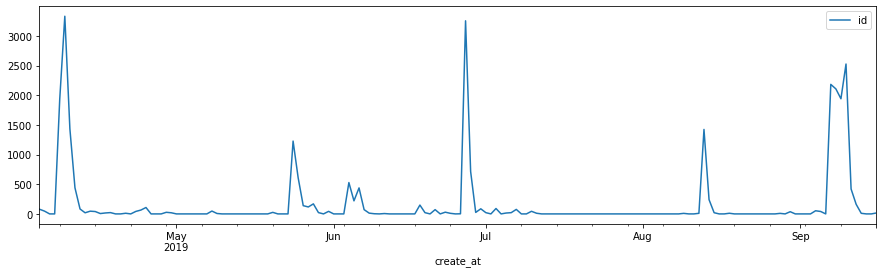

In [38]:
aux = pd.pivot_table(answers,index=answers['create_at'], values=['id'], aggfunc='count')
aux.set_index(pd.to_datetime(aux.index),inplace=True)
# aux_month = aux.loc[:'2019-03'].resample('M').sum()
aux_day = aux.resample('D').sum()
aux_day.plot(figsize=(15, 4))
# # aux_month
# plt.xlabel('Fecha', size=14)
# plt.ylabel('Ingreso en MM$', size=14)
# plt.ticklabel_format(axis='y',style='sci',scilimits=(9,9))

### Filtro por edad

In [39]:
df[(df['gender']==0)]['age'].describe()


count    15135.000000
mean        30.837132
std          9.685403
min         12.000000
25%         23.000000
50%         28.000000
75%         37.000000
max         99.000000
Name: age, dtype: float64

In [40]:
df[(df['gender']==1)]['age'].describe()

count    11488.000000
mean        30.267061
std          9.436867
min         15.000000
25%         23.000000
50%         29.000000
75%         36.000000
max         93.000000
Name: age, dtype: float64

In [41]:
# 30,83 , 28 mediana
# 30,26, 29 mediana

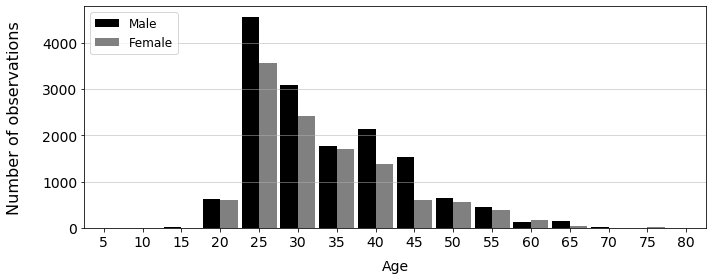

In [45]:
data = answers.groupby('user_id').count().loc[:,'id'].values
bins = np.arange(0,85,5)
# plt.figure(figsize=[10,4])
fig, ax = plt.subplots(figsize=[10,4])
_, bins, patches = plt.hist([df[(df['gender']==0)]['age'],
                            df[(df['gender']==1)]['age']],
                            # normed=1,  # normed is deprecated; replace with density
#                             density=True,
                            bins=bins, color=['Black','grey'], label=['Male','Female'],
                            rwidth = 0.9)

xlabels = bins[1:].astype(str)
# xlabels[-1] += '+'

N_labels = len(xlabels)
plt.xlim([0, 80])
plt.xticks(5 * np.arange(N_labels) + 2.5)
ax.set_xticklabels(xlabels)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

# plt.yticks([])
plt.title('')

plt.ylabel("Number of observations", fontsize=16, labelpad=20)
plt.xlabel("Age", fontsize=14, labelpad=10)

plt.setp(patches, linewidth=0)
plt.legend(loc='upper left',fontsize = 'large')
plt.grid(True, axis='y',which='both',
         linestyle='-', linewidth=0.5)
fig.tight_layout()

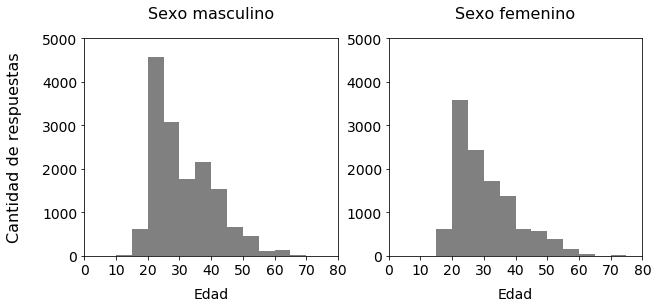

In [43]:
nbins = np.arange(0,80,5)
y_lim = 5_000



plt.figure(figsize=[10,4])
# plt.suptitle('Hist edades usuarios')

plt.subplot(121)
plt.title("Sexo masculino", fontsize=16, pad=20)
plt.hist(df[(df['gender']==0)]['age'], bins=nbins, color=['Grey'], rwidth = 1)
plt.ylim(0, y_lim)
plt.xlim(0, 80)
plt.ylabel("Cantidad de respuestas", fontsize=16, labelpad=20)
plt.xlabel("Edad", fontsize=14, labelpad=10)
plt.xticks(size = 14)
plt.yticks(size = 14)
# plt.tick_params(axis='both', which='major', pad=15)
# plt.label_params(axis='both', which='major', pad=15)

plt.subplot(122)
plt.title("Sexo femenino", fontsize=16, pad=20)
plt.hist(df[(df['gender']==1)]['age'], bins=nbins,color=['Grey'], rwidth = 1)
plt.ylim(0, y_lim)
plt.xlim(0, 80)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel("Edad", fontsize=14, labelpad=10)

# plt.subplot(133)
# plt.title("Sexo no binario")
# plt.hist(df[(df['gender']==99)]['age'], bins=nbins,color=['Grey'])
# plt.ylim(0, y_lim)
# plt.xlim(0, 80)
# plt.xlabel("Edad")


plt.show()

In [47]:
(1-0.53)/(0.53/3.87)

3.43188679245283

## Frecuencia de imagenes

### Por pares de imagenes

In [42]:
pairs_count = pd.DataFrame(df.groupby(['img_1','img_2'])['id'].count())
pairs_count = pairs_count.reset_index()
pairs_count.groupby('id').count()
# pairs_count[(pairs_count.id != 1)]

,img_1,img_2
id,,
1,26836,26836
2,32,32
3,3,3
4,1,1


In [61]:
26836+32*2+3*3+1*4

26913

### de forma individual

In [45]:
img_used = pd.DataFrame(pd.concat([df['img_1'],df['img_2']],axis=0,sort=True),columns=pd.Index(['id']))
img_used = pd.DataFrame(img_used.groupby(['id'])['id'].count())
img_used.columns = pd.Index(['N'])
# img_used
img_used.groupby('N')['N'].count()
# img_used.hist()

N
1    32765
2     8177
3     1328
4      154
5       19
6        2
Name: N, dtype: int64

In [63]:
(1*    32765 + \
2*     8177 + \
3*     1328 + \
4*      154 + \
5*       19 + \
6*        2)/2

26913.0

In [67]:
32765 +\
8177 +\
1328 +\
154 +\
19 +\
2

42445

In [73]:
img_used.shape

(42445, 1)

In [74]:
img_used.index

Index(['50e5f7d4d7c3df413b00056a', '50e5f7d4d7c3df413b00056b',
       '50e5f7d4d7c3df413b00056f', '50e5f7d5d7c3df413b000576',
       '50e5f7d5d7c3df413b000577', '50e5f7d5d7c3df413b000579',
       '50e5f7d6d7c3df413b00057c', '50e5f7d6d7c3df413b00057d',
       '50e5f7d6d7c3df413b000584', '50e5f7d6d7c3df413b000585',
       ...
       '5185d51afdc9f03fd5001477', '5185d51cfdc9f03fd500147b',
       '5185d51cfdc9f03fd500147c', '5185d51dfdc9f03fd500147d',
       '5185d521fdc9f03fd500147f', '5185d524fdc9f03fd5001483',
       '5185d52ffdc9f03fd5001489', '5185d52ffdc9f03fd500148a',
       '5185d530fdc9f03fd500148b', '5185d533fdc9f03fd500148e'],
      dtype='object', name='id', length=42445)

In [75]:
features.columns

Index(['Unnamed: 0', 'ID', 'NA', 'blobs', 'edges', 'mean_bn', 'mean_bs',
       'mean_h', 'mean_l', 'mean_s', 'stdev_bn', 'stdev_bs', 'stdev_h',
       'stdev_l', 'stdev_s', 'Bicyclist_N', 'Bicyclist_S', 'Building_N',
       'Building_S', 'Car_N', 'Car_S', 'Fence_N', 'Fence_S', 'Pavement_N',
       'Pavement_S', 'Pedestrian_N', 'Pedestrian_S', 'Pole_N', 'Pole_S',
       'Road_N', 'Road_S', 'SignSymbol_N', 'SignSymbol_S', 'Sky_N', 'Sky_S',
       'Tree_N', 'Tree_S', 'Unlabelled_N', 'Unlabelled_S', 'od_bench',
       'od_bicycle', 'od_boat', 'od_bus', 'od_car', 'od_chair',
       'od_fire_hydrant', 'od_motorcycle', 'od_person', 'od_potted_plant',
       'od_stop_sign', 'od_traffic_light', 'od_train', 'od_truck',
       'od_umbrella'],
      dtype='object')

In [76]:
features_used = features.loc[(features.ID.isin(img_used.index))]

In [112]:
features_used.loc[:,[column for column in features_used.columns if column.endswith("_S")]].replace(0.0,np.nan)

,Bicyclist_S,Building_S,Car_S,Fence_S,Pavement_S,Pedestrian_S,Pole_S,Road_S,SignSymbol_S,Sky_S,Tree_S,Unlabelled_S
0,0.024247,0.169884,0.086808,0.003452,0.112653,0.026242,0.055878,0.456444,0.007231,0.013599,0.043561,NaN
1,NaN,0.356702,0.045649,0.038278,0.062735,0.000210,0.025927,0.030219,0.040984,0.004968,0.394327,NaN
5,0.002123,0.124048,0.041159,0.048553,0.126859,0.021238,0.054175,0.415659,0.009027,0.122100,0.035059,NaN
12,NaN,0.200674,0.003207,0.313666,0.101153,0.001714,0.022626,0.290631,0.004770,NaN,0.061557,NaN
13,0.000863,0.078935,0.047527,0.093526,0.139362,0.008246,0.040529,0.564187,0.003522,0.007149,0.016153,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
111282,0.000373,0.000478,0.000058,0.034546,0.087053,NaN,0.004735,0.567302,0.019594,NaN,0.285861,NaN
111288,0.000653,0.014987,0.000140,0.004304,0.160938,NaN,0.003790,0.665994,NaN,0.023466,0.125727,NaN
111289,NaN,0.023886,0.159305,0.027968,0.092080,0.004164,0.006636,0.615668,0.006170,0.000012,0.064112,NaN
111290,0.000513,0.000105,0.041171,0.074317,0.193851,0.001050,0.002951,0.551405,NaN,NaN,0.134638,NaN


In [122]:
round(features_used.loc[:,[column for column in features_used.columns if column.endswith("_S")]].replace(0.0,np.nan).describe().T,2).sort_values('mean',ascending=False)
# .to_latex()

,count,mean,std,min,25%,50%,75%,max
Road_S,42438.0,0.37,0.15,0.0,0.26,0.38,0.48,0.84
Pavement_S,42439.0,0.18,0.10,0.0,0.10,0.17,0.24,0.82
Tree_S,42118.0,0.13,0.13,0.0,0.04,0.10,0.18,0.97
Building_S,42216.0,0.11,0.11,0.0,0.03,0.08,0.16,0.77
Car_S,41814.0,0.08,0.08,0.0,0.02,0.05,0.12,0.70
Fence_S,42183.0,0.08,0.06,0.0,0.03,0.07,0.11,0.70
Pole_S,42433.0,0.02,0.01,0.0,0.01,0.02,0.03,0.14
Sky_S,19954.0,0.02,0.03,0.0,0.00,0.00,0.02,0.78
Pedestrian_S,40420.0,0.01,0.01,0.0,0.00,0.00,0.01,0.17
SignSymbol_S,41454.0,0.01,0.02,0.0,0.00,0.01,0.02,0.33


## Visualizar imagenes

In [136]:
from PIL import Image
import requests
from io import BytesIO
import os
import six.moves.urllib as urllib

In [194]:
def show_img(img_id = '513da00ffdc9f035870088ac'):
    url_base = 'http://wekun.ing.puc.cl/static/img/'
    url = url_base + img_id + '.jpg'
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
#     plt.imshow(img)
    return img

def show_pair(img_1 = '513da00ffdc9f035870088ac',img_2 = '5140cc2efdc9f04926002d36'):
    url_base = 'http://wekun.ing.puc.cl/static/img/'
    url_1 = url_base + img_1 + '.jpg'
    url_2 = url_base + img_2 + '.jpg'
    response_1 = requests.get(url_1)
    response_2 = requests.get(url_2)
    img_1 = Image.open(BytesIO(response_1.content))
    img_2 = Image.open(BytesIO(response_2.content))
    
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    plt.imshow(img_1)
    plt.subplot(122)
    plt.imshow(img_2)
    plt.show()

### Errores ¿son errores o =?

In [41]:
pairs_errores = df[(df['choice']== 99)][['img_1','img_2']]
lista_errores = pd.concat([pairs_errores['img_1'],pairs_errores['img_2']],axis=0)
lista_errores = list(lista_errores.unique())
len(lista_errores)


3402

In [42]:
df.shape

(27275, 32)

In [43]:
pairs_errores = df[(df['choice']== 99)][['img_1','img_2']]
lista_errores = pd.concat([pairs_errores['img_1'],pairs_errores['img_2']],axis=0)
lista_errores = list(lista_errores.unique())
# lista_errores


# opener = urllib.request.URLopener()
# url_base = 'http://wekun.ing.puc.cl/static/img/'
# img_id = '513da00ffdc9f035870088ac'
DEST_PATH = 'C:/Users/Tom/Desktop/Errores/'
# # for img in lista_errores:
# #     opener.retrieve(url_base + img + '.jpg', DEST_PATH + img + '.jpg')

errores = pd.read_csv('Respaldo/errores.csv')


errores_revisados = os.listdir(DEST_PATH)
for i in range(len(errores_revisados)):
    errores_revisados[i] = errores_revisados[i].replace('.jpg','')
errores_revisados = pd.DataFrame(errores_revisados)

errores = pd.concat([errores['0'],errores_revisados[0]],axis=0,sort=True)
errores = pd.DataFrame(errores.unique())
errores

errores.to_csv('Respaldo/errores_actualizado.csv', index=False)


# errores = pd.read_csv('Respaldo/errores.csv')

pairs_x = pairs_errores[~(pairs_errores['img_1'].isin(errores[0])) &
                        ~(pairs_errores['img_2'].isin(errores[0]))]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Tom/Desktop/Errores/'

In [44]:
img_1,img_2 = pairs_x.sample().values.tolist()[0]
show_pair(img_1,img_2)

NameError: name 'pairs_x' is not defined

## Segmentation Features

In [4]:
features = pd.read_csv('new_features_imagenes.csv')

In [5]:
features

,ID,NA,blobs,edges,mean_bn,mean_h,mean_l,mean_s,stdev_bn,stdev_h,...,od_chair,od_fire_hydrant,od_motorcycle,od_person,od_potted_plant,od_stop_sign,od_traffic_light,od_train,od_truck,od_umbrella
0,50e5f7d4d7c3df413b00056e,0.0,11.0,0.02166,141.89564,52.54376,140.61524,19.61407,42.61492,37.05965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50e5f7d4d7c3df413b000570,1.0,2.0,0.00310,225.42156,24.16589,224.42999,22.01212,15.46267,5.30549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50e5f7d5d7c3df413b000575,0.0,8.0,0.02298,139.92237,57.39396,139.11004,28.38490,56.82672,39.62453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50e5f7d6d7c3df413b00057d,0.0,8.0,0.04317,118.43640,43.39086,117.29517,20.60941,47.35465,41.91104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50e5f7d7d7c3df413b000588,0.0,3.0,0.03451,129.99497,60.79281,128.77127,32.39869,44.55617,42.10714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111294,5185d502fdc9f03fd500145f,0.0,8.0,0.02267,132.07492,49.08679,129.77003,32.25818,43.27235,38.87897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111295,5185d50afdc9f03fd5001467,0.0,8.0,0.02634,129.32907,52.98770,126.86183,42.19003,55.61346,39.29136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111296,5185d510fdc9f03fd500146f,0.0,7.0,0.04231,119.83357,41.77837,114.64786,49.10385,41.03883,37.11723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111297,5185d51afdc9f03fd5001479,0.0,1.0,0.02339,122.69047,49.94314,121.54346,21.36622,53.42279,41.89740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
for i in features.columns:
    print(i)

ID
NA
blobs
edges
mean_bn
mean_h
mean_l
mean_s
stdev_bn
stdev_h
stdev_l
stdev_s
Bicyclist_N
Bicyclist_S
Building_N
Building_S
Car_N
Car_S
Fence_N
Fence_S
Pavement_N
Pavement_S
Pedestrian_N
Pedestrian_S
Pole_N
Pole_S
Road_N
Road_S
SignSymbol_N
SignSymbol_S
Sky_N
Sky_S
Tree_N
Tree_S
Unlabelled_N
Unlabelled_S
outlier_bn
outlier_hs
outlier_hlf
od_bench
od_bicycle
od_boat
od_bus
od_car
od_chair
od_fire_hydrant
od_motorcycle
od_person
od_potted_plant
od_stop_sign
od_traffic_light
od_train
od_truck
od_umbrella


Text(0.5, 0, 'Porcentaje')

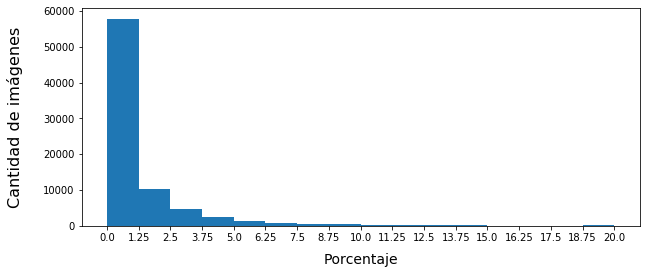

In [48]:
data = features.sort_values('Car_N',ascending=False).loc[(features['Car_N'] != 0),['Car_N']].values #(features['Car_S']!=0)
# data = data * 100 + 1
bins = np.arange(0,0.21,0.0125)
# plt.figure(figsize=[10,4])
fig, ax = plt.subplots(figsize=[10,4])
_, bins, patches = plt.hist(np.clip(data, bins[0], bins[-1]), bins=bins)
#                             normed=1)  # normed is deprecated; replace with density
#                             density=True,
#                             color=['Lightgrey'],
#                             rwidth = 0.9)

lmda = 1/0.012173
# N = features.sort_values('Car_N',ascending=False).loc[:,['Car_N']].shape[0]
X2 = np.arange(0,0.1,0.01)
Y2 = lmda * np.exp(-lmda*(X2))
# plt.plot(X2,Y2)
# plt.ylim([0,80000])


xlabels = [str(round(i,2)) for i in (bins[0:]*100).tolist()]
# # xlabels[-1] += '+'

N_labels = len(xlabels)
# plt.xlim([0, 80])
plt.xticks(np.arange(N_labels)/80)
ax.set_xticklabels(xlabels)
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14) 

# # plt.yticks([])
# plt.title('')

plt.ylabel("Cantidad de imágenes", fontsize=16, labelpad=20)
plt.xlabel("Porcentaje", fontsize=14, labelpad=10)

# plt.setp(patches, linewidth=0)
# plt.legend(loc='upper left',fontsize = 'large')
# plt.grid(True, axis='y',which='both',
#          linestyle='-', linewidth=0.5)
# fig.tight_layout()

In [38]:
xlabels

['1.25',
 '2.5',
 '3.75',
 '5.0',
 '6.25',
 '7.5',
 '8.75',
 '10.0',
 '11.25',
 '12.5',
 '13.75',
 '15.0',
 '16.25',
 '17.5',
 '18.75',
 '20.0']

In [ ]:
features.sort_values('Car_N',ascending=False).loc[(features['Bicyclist_N']!=0),['Bicyclist_N']].describe()

In [ ]:
%matplotlib inline

In [8]:
url_base = 'http://wekun.ing.puc.cl/static/img/'
  
sorted_car_n = features.sort_values('Bicyclist_N',ascending=False).loc[:,['ID']]
sorted_car_n.reset_index(inplace=True, drop=True)

for img_id in sorted_car_n.loc[100:106,'ID'].to_list():
    url = url_base + img_id + '.jpg'
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10,6))
    plt.imshow(img)
    plt.axis('off')

NameError: name 'requests' is not defined

In [226]:
features.loc[(features['ID']==img_id),:].T

,26212
ID,513cc67cfdc9f0358700195b
NA,0
blobs,8
edges,0.09795
mean_bn,109.018
mean_h,67.8228
mean_l,107.184
mean_s,40.9546
stdev_bn,61.9788
stdev_h,44.1777


In [ ]:
lista_imagenes = [i[0] for i in features.sort_values('od_car',ascending=False).loc[:,['ID']].head(20).values.tolist()]

In [ ]:
lista_imagenes

In [ ]:
features.loc[(features['ID'].isin(errores[0])),'NA'] = 1.0
# features.loc[(features['ID'].isin(errores['0']))]

In [ ]:
# lista_imagenes = features.sort_values(['Car_S'],ascending=False).loc[:,['ID']].head(100).values.tolist()
img_used = pd.DataFrame(pd.concat([df.loc[(df['question']==3),'img_1'],
                                   df.loc[(df['question']==3),'img_2']],
                                  axis=0,sort=True),columns=pd.Index(['id']))
lista_imagenes = img_used['id'].unique()

In [35]:
opener = urllib.request.URLopener()
url_base = 'http://wekun.ing.puc.cl/static/img/'
# img_id = '513da00ffdc9f035870088ac'
DEST_PATH = 'C:/Users/Tom/Desktop/Cars/'
for img in lista_imagenes:
    opener.retrieve(url_base + img + '.jpg', DEST_PATH + img + '.jpg')

In [19]:
lista_imagenes.shape

(8299,)

## Object Detection Features

In [38]:
# models_db = pd.merge(A,U, how='inner', on='user_id', sort=False, indicator=False)
# models_db = models_db.merge(features, how='inner', left_on='img_1', right_on='ID', sort=False, suffixes=('', '_izq'))
# models_db = models_db.merge(features, how='inner', left_on='img_2', right_on='ID', sort=False, suffixes=('_izq', '_der'))
# models_db = models_db.drop(columns=['user_id','img_1','img_2','ID_izq','ID_der'])

In [39]:
# aux_db = models_db[(models_db['NA_izq'] == 0) & (models_db['NA_der'] == 0) & \
#              (models_db['outlier_bn_izq'] == 0) & (models_db['outlier_bn_der'] == 0) & \
#              (models_db['outlier_hs_izq'] == 0) & (models_db['outlier_hs_der'] == 0) & \
#              (models_db['outlier_hlf_izq'] <= 1) & (models_db['outlier_hlf_der'] <= 1) & \
#              (models_db['choice'] != 99)]

In [40]:
# models_db.to_csv('./../04 Modelos/all_answers.dat', sep='\t', header=True, index=False, doublequote=True, decimal='.')

## Barplot Psicometricos

C:\Users\Tom\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  # Remove the CWD from sys.path while we load stuff.


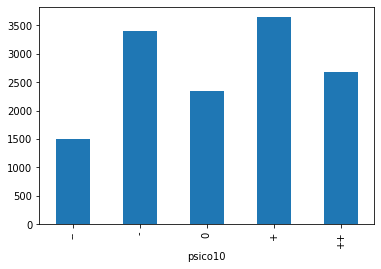

In [41]:
n = 10 ## n = {1, ..., 10}
query = pd.DataFrame(df.groupby(['psico{}'.format(n)])['id'].count())
query['order'] = query.index
query['order'] = query['order'].replace({'--':0,
                                         '-':1,
                                         '0':2,
                                        '+':3,
                                        '++':4})
query = query.sort_values('order')
query['id'].plot('bar')

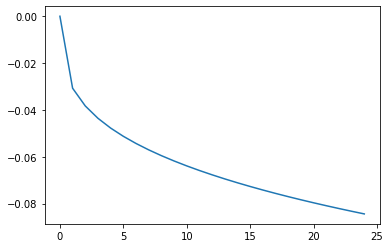

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
L = 0.317916
B = -0.051283

# red dashes, blue squares and green triangles
plt.plot(B*t**L)
# plt.show()